Link para acesso colab:
https://colab.research.google.com/github/vaalton/aulaPLP/blob/main/Trilha_4_Exercicio_de_Aprofundamento.ipynb



**Trilha 4 - Exercício de Aprofundamento**

Aqui você vai empregar os conhecimentos aprendidos de Python para efetuar sua própria Análise de Dados. Empregue bases de dados extraídas de um ou ambos os sites abaixo:  

a. https://wid.world/

b. https://www.gapminder.org/

O emprego de uma base formada por dados de ambos os sites é bastante enriquecedor mas não é obrigatório. Você pode empregar uma ou mais bases de um único site e deixar para estudar mais adiante merges e joins de tabelas com R. 

Faça uma Análise Exploratória dos Dados (EDA) com dados de seu interesse, empregando o Python e o que você aprendeu até aqui. Os sites apresentam diversos dados sobre as diferenças de desenvolvimento dos países e a desigualdade. Foque em perguntas que são do seu interesse sobre os dados.  

Na sua análise você deve responder ao menos quatro perguntas relevantes sobre os dados, incluir na sua análise seleções e visualizações dos dados e um texto de conclusão a cada pergunta.  

Peça ao professor modelos de código para sua implementação. 

Seu código deve ser minimamente claro e organizado. Não são necessários comentários detalhados, mas deixe claro no seu código cada parte (atividade), cada fase realizada e a resposta final com sua conclusão.  


# Importando as bases

Busquei no WID 5 bases de dados com relação ao brasil:

-> Renda nacional bruta

-> População Adulta 

-> Consumo de capital fixo

-> População entre 90 e 94 anos

-> População entre 95 e 99 anos

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [11]:
GNI_BR = pd.read_excel('Gross national income.xlsx')
ConsumoDeCapital = pd.read_excel('Consumo de Capital fixo.xlsx')
PopAdult = pd.read_excel('População Adulta.xlsx')
Pop90a94 = pd.read_excel('População 90 a 94.xlsx')
Pop95a99 = pd.read_excel('População 95 a 99.xlsx')

# Tratamento dos dados

Tratamento para que os dataframes fiquem no mesmo padrão possibilitando um merge

In [12]:
GNI_BR = GNI_BR.rename(columns={'value':'RNB'})
GNI_BR.drop(columns=['shortname'],inplace=True)
GNI_BR.head()

,country,year,RNB
0,BR,1950,15444.4
1,BR,1951,15764.0
2,BR,1952,16265.5
3,BR,1953,16611.5
4,BR,1954,17251.5


In [13]:
ConsumoDeCapital = ConsumoDeCapital.rename(columns={'value':'ConsumoDeCapital'})
ConsumoDeCapital.drop(columns=['Shortname'],inplace=True)
ConsumoDeCapital.head()

,country,year,ConsumoDeCapital
0,BR,1950,662.1
1,BR,1951,680.7
2,BR,1952,700.4
3,BR,1953,721.8
4,BR,1954,745.8


In [14]:
PopAdult = PopAdult.rename(columns={'value':'PopAdulta'})
PopAdult.drop(columns=['Shortname'],inplace=True)
PopAdult.head()

,country,year,PopAdulta
0,BR,1950,26138182.0
1,BR,1951,26830918.0
2,BR,1952,27551936.0
3,BR,1953,28277184.0
4,BR,1954,29029772.0


In [15]:
Pop90a94 = Pop90a94.rename(columns={'value':'Pop90a94'})
Pop90a94.drop(columns=['Shortname'],inplace=True)
Pop90a94.head()

,country,year,Pop90a94
0,BR,1950,15773.0
1,BR,1951,14588.0
2,BR,1952,13278.0
3,BR,1953,11425.0
4,BR,1954,8904.0


In [16]:
Pop95a99 = Pop95a99.rename(columns={'value':'Pop95a99'})
Pop95a99.drop(columns=['Shortname'],inplace=True)
Pop95a99.head()

,country,year,Pop95a99
0,BR,1950,9298.0
1,BR,1951,7593.0
2,BR,1952,6497.0
3,BR,1953,5535.0
4,BR,1954,4277.0


In [17]:
# Criação de um dataframe com o somatório das populações com idade entre 90 a 99

Pop95a99['Pop95a99'] = Pop90a94['Pop90a94']+Pop95a99['Pop95a99']
Pop90a99 = Pop95a99.rename(columns={'Pop95a99':'Pop90a99'})
Pop90a99.head() 

,country,year,Pop90a99
0,BR,1950,25071.0
1,BR,1951,22181.0
2,BR,1952,19775.0
3,BR,1953,16960.0
4,BR,1954,13181.0


In [18]:
Brasa = pd.merge(GNI_BR,PopAdult,how='left',on=['country','year'])
Brasa = pd.merge(Brasa,ConsumoDeCapital,how='left',on=['country','year'])
Brasa = pd.merge(Brasa,Pop90a99,how='left',on=['country','year'])
Brasa.head()

,country,year,RNB,PopAdulta,ConsumoDeCapital,Pop90a99
0,BR,1950,15444.4,26138182.0,662.1,25071.0
1,BR,1951,15764.0,26830918.0,680.7,22181.0
2,BR,1952,16265.5,27551936.0,700.4,19775.0
3,BR,1953,16611.5,28277184.0,721.8,16960.0
4,BR,1954,17251.5,29029772.0,745.8,13181.0


# **Primeira Pergunta:**

O crescimento da renda nacional bruta acompanha o crescimento da população adulta?

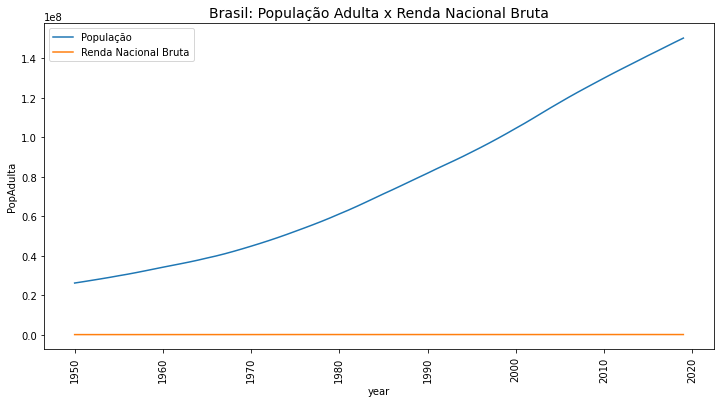

In [ ]:
plt.figure(figsize=(12,6))

sns.lineplot(x=Brasa.year, y=Brasa.PopAdulta, label='População')
sns.lineplot(x=Brasa.year, y=Brasa.RNB, label='Renda Nacional Bruta')

plt.title('Brasil: População Adulta x Renda Nacional Bruta', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

Com essa primeira análise podemos ver que o crescimento da população foi muito maior do que o crescimento da renda nacional bruta, porém, como os gráficos estão em escalas diferentes, essa primeira visualização pode ser errônea, vamos ajustar os gráficos e fazer uma análise logarítmica.

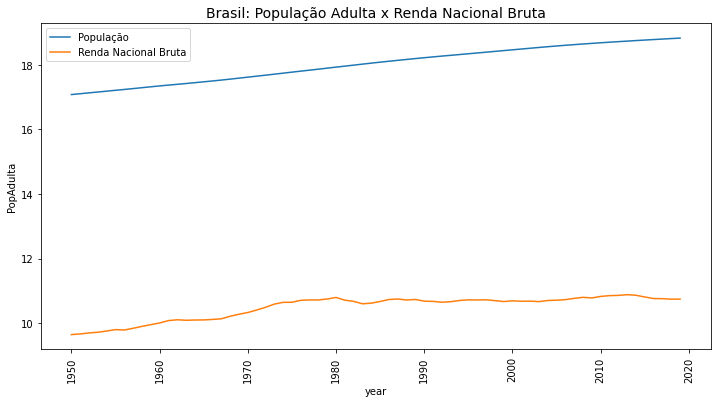

In [ ]:
plt.figure(figsize=(12,6))

sns.lineplot(x=Brasa.year, y=np.log(Brasa.PopAdulta), label='População')
sns.lineplot(x=Brasa.year, y=np.log(Brasa.RNB), label='Renda Nacional Bruta')

plt.title('Brasil: População Adulta x Renda Nacional Bruta', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

**Conclusão**

Com essa análise podemos perceber uma correlação muito alta entre o crescimento da população adulta e o crescimento da renda nacional bruta. Não podemos indicar 100% causalidade, porém faz todo sentido, aumento da população adulta, mais pessoas trabalhando, aumento da renda nacional bruta do país.

# **Segunda Pergunta:**
Qual foi o crescimento da população ao longo da amostra?


Como é a relação da população adulta com a população acima de 90 anos? 




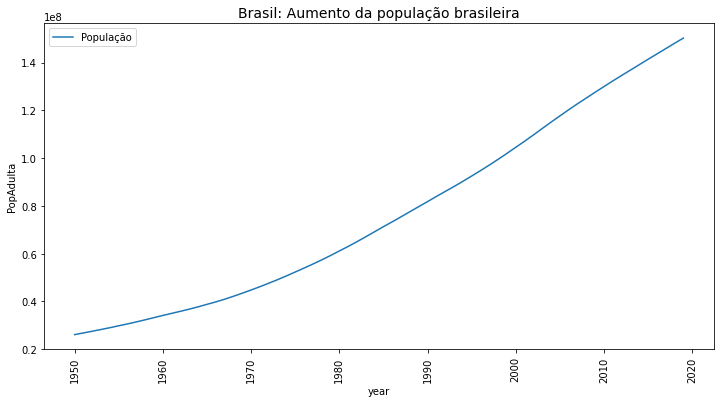

In [ ]:
plt.figure(figsize=(12,6))

sns.lineplot(x=Brasa.year, y=Brasa.PopAdulta, label='População')

plt.title('Brasil: Aumento da população brasileira', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [ ]:
PopAdult.head()

,country,year,PopAdulta
0,BR,1950,26138182.0
1,BR,1951,26830918.0
2,BR,1952,27551936.0
3,BR,1953,28277184.0
4,BR,1954,29029772.0


In [ ]:
PopAdult.tail()

,country,year,PopAdulta
65,BR,2015,141373696.0
66,BR,2016,143572000.0
67,BR,2017,145811792.0
68,BR,2018,148048880.0
69,BR,2019,150228224.0


In [ ]:
Pop2019 = PopAdult.loc[69,'PopAdulta']
Pop1950 = PopAdult.loc[0,'PopAdulta']

In [ ]:
Aumento = Pop2019 - Pop1950
print('A população brasileira aumentou {:0.0f} no número de habitantes'.format(Aumento))
Porcent = (((Pop2019 / Pop1950))*100)
print('Representando um aumento de {:0.2f}% de 2019 em relação a 1950.'.format(Porcent))

A população brasileira aumentou 124090042 no número de habitantes
Representando um aumento de 574.75% de 2019 em relação a 1950.


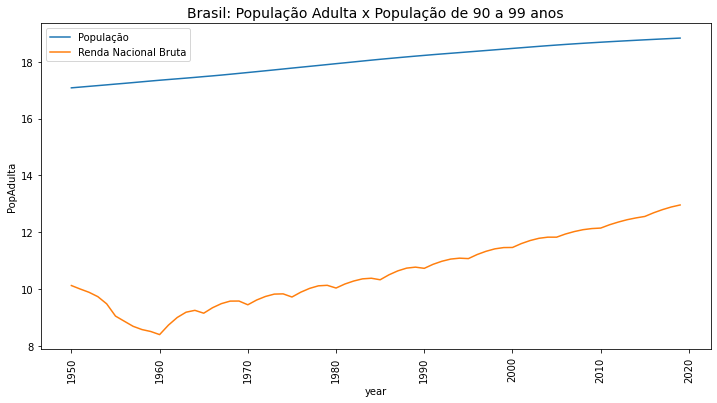

In [19]:
plt.figure(figsize=(12,6))

sns.lineplot(x=Brasa.year, y=np.log(Brasa.PopAdulta), label='População')
sns.lineplot(x=Brasa.year, y=np.log(Brasa.Pop90a99), label='Renda Nacional Bruta')

plt.title('Brasil: População Adulta x População de 90 a 99 anos', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

**Respostas:**

Primeira questão:

A população brasileira aumentou 124090042 no número de habitantes
Representando um aumento de 574.75% de 2019 em relação a 1950.

Segunda questão:

Podemos observar que depois de 1970 o crescimento da população de 90 a 99 anos é relatavimente proporcional ao da popuolação, antes disso podemos ver até uma diminuição, o que pode mostrar que a expectativa de vida vem aumentando ao longo dos anos.



# **Terceira questão**

Qual a relação entre as 4 váriaveis da planilha "Brasa"?


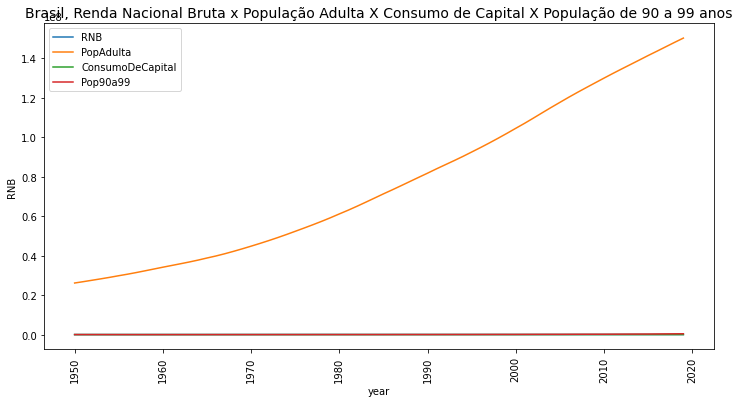

In [20]:
plt.figure(figsize=(12,6))

for c in Brasa[['RNB','PopAdulta','ConsumoDeCapital','Pop90a99']]:
  sns.lineplot(x=Brasa.year, y=Brasa[c], label=c)

plt.title('Brasil, Renda Nacional Bruta x População Adulta X Consumo de Capital X População de 90 a 99 anos', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

Com essa primeira análise, não podemos ver muita variação, devido a grande diferença de escalas, para resolver esse problema vamos normalizar os dados e deixa-los na mesma escala


In [21]:
for c in Brasa[['RNB','PopAdulta','ConsumoDeCapital','Pop90a99']]:
  Brasa[c] = Brasa[c] / Brasa[c].max()
Brasa.head()

,country,year,RNB,PopAdulta,ConsumoDeCapital,Pop90a99
0,BR,1950,0.290452,0.173990,0.152537,0.058893
1,BR,1951,0.296462,0.178601,0.156822,0.052105
2,BR,1952,0.305894,0.183401,0.161360,0.046453
3,BR,1953,0.312401,0.188228,0.166290,0.039840
4,BR,1954,0.324437,0.193238,0.171820,0.030963


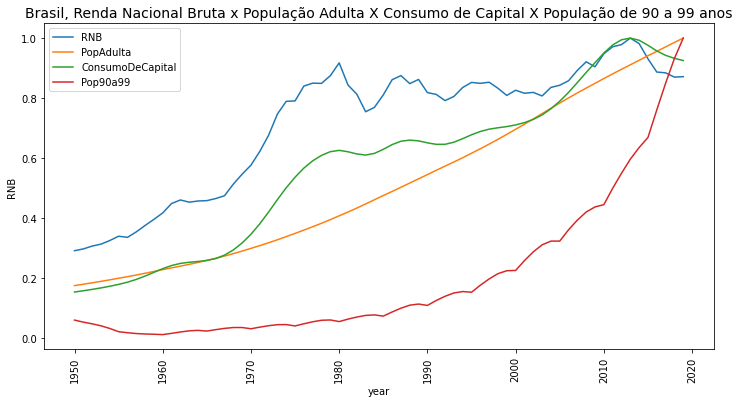

In [22]:
plt.figure(figsize=(12,6))

for c in Brasa[['RNB','PopAdulta','ConsumoDeCapital','Pop90a99']]:
  sns.lineplot(x=Brasa.year, y=Brasa[c], label=c)

plt.title('Brasil, Renda Nacional Bruta x População Adulta X Consumo de Capital X População de 90 a 99 anos', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

**Conclusão**

Já com esse gráfico podemos ver uma correlação muito grande entre as variáveis, a população adulta sempre aumentando, já as outras duas, principalmente renda nacional bruta, com alguns "soluços" entre 1980 e 1990, porém com uma tendência de crescimento
Podemos ver também que a população entre 90 a 99 começa a crescer bastante após os anos 2000, mostrando um aumento considerável na expectativa de vida.

# **Quarta questão**

Qual a correlação entre as 4 variavéis analisadas?

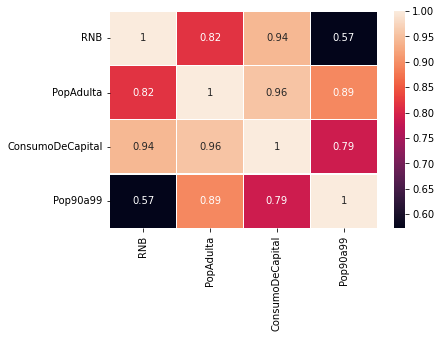

In [24]:
sns.heatmap(Brasa[['RNB','PopAdulta','ConsumoDeCapital','Pop90a99']].corr(),annot=True,linewidths=.5)

plt.show()

**Conclusão**

Conforme analisado no gráfico da terceira questão, podemos observar que a correlação entre Consumo de capital e Renda Nacional Bruta é maior do que a população adulta, isso explica muito o gráfico que vimos.
Mais adultos, mais mão de obra de trabalho, aumenta da renda, aumento do consumo de capital. 
Como a população não diminui, existe alguns períodos em que a Renda diminuiu, trazendo o consumo de capital também para baixo.
Já a população de 90 a 99 anos tem uma correlação baixa comparado com os outros dados, mostrando que outros fatores influenciam no aumento ou diminuição dessa faixa de idade.